# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

In [2]:
data = {'StudentID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
        'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]}

student_data = pd.DataFrame(data)

student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [3]:
import matplotlib.pyplot as plt

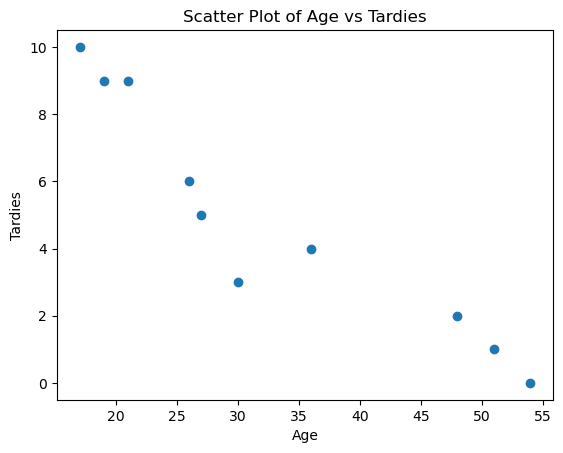

In [4]:
# Scatter plot

plt.scatter(student_data.Age, student_data.Tardies)


plt.title('Scatter Plot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.show()

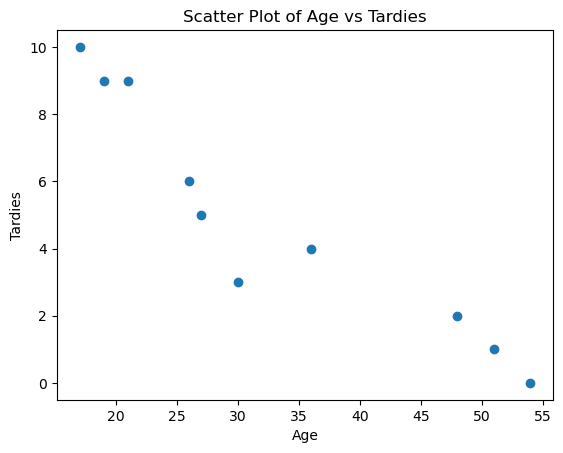

In [5]:
# Scatter plot

plt.scatter(student_data['Age'], student_data['Tardies'])


plt.title('Scatter Plot of Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

    Se puede observar la tendencia previamente comentada. 
    La tendencia se observa en la edad, cuanto más jóvenes, es más habitual que lleguen tarde. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Calcula la matriz de covarianza

covar = student_data[['Age', 'Tardies']].cov()
covar

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


 -  **Covarianza:**
        
         La covarianza entre "Edad" y "Retrasos" es de -45,57. Este valor negativo indica una relación inversa, lo que sugiere que a medida que una variable aumenta, la otra tiende a disminuir. En este caso, a medida que la "Edad" aumenta, los "Retrasos" disminuyen. 
         Sin embargo, la magnitud de la covarianza no da una idea clara de la fuerza de la relación.

In [8]:
# Calcula la matriz de correlacion

correl = student_data[['Age', 'Tardies']].corr()
correl

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


   - **Correlación**:
   
    El coeficiente de correlación entre "Edad" y "Retrasos" es de -0,939. 
    
    Se trata de una fuerte correlación negativa. El hecho de que se aproxime a -1 indica un alto grado de dependencia lineal entre las dos variables. En otras palabras, a medida que la "Edad" aumenta, los "Retrasos" tienden a disminuir, y viceversa.

    En resumen, mientras que la covarianza da una idea de la dirección de la relación (positiva o negativa), la correlación proporciona una medida más estandarizada de la proximidad entre las variables. 
    En este caso, la fuerte correlación negativa sugiere una relación lineal significativa entre la "Edad" aumenta, los "Retrasos" , lo que apoya la hipótesis inicial de que los alumnos más jóvenes llegan más a menudo tarde a clase.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import r2_score

In [11]:
# Defino las variables de prediccion (X) y de testeo (y)

X = student_data[['Age']]
y = student_data['Tardies']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

In [12]:
ridge = Ridge()
ridge.fit(X_train, y_train)

# Calculate R-squared for training and testing data

train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)


train_score, test_score

(0.803887455410226, -3.2190535077288853)

- **Explicacion**
    - **R-cuadrado (train_score): 0.80**
      Lo que indica que el modelo explica aproximadamente el 80% de la varianza de los datos de entrenamiento. 
      Esto indica que la variable "Edad" explica una parte significativa de la variabilidad de la impuntualidad.
      
    -  **R-cuadrado (test_score): -3.22**
       El cuadrado R negativo en los datos de prueba es inusual y suele indicar que el modelo funciona mal con datos nuevos y desconocidos.
       Una R-cuadrado negativa puede sugerir un ajuste excesivo u otros problemas con el modelo.
       La R-cuadrado negativa en los datos de prueba plantea dudas sobre la generalización del modelo a los nuevos datos.

In [33]:
## uso el modelo e regresion lineal, con los datos de las X e Y que me dan como dataframe

In [24]:
X = student_data[['Age']]
y = student_data['Tardies']

In [25]:
linreg = LinReg()     #inicializa el modelo

linreg.fit(X, y)    #ajusta el modelo

LinearRegression()

In [26]:
linreg.coef_

#estos numeros representan el aprendizaje de la máquina

array([-0.24282077])

In [27]:
linreg.intercept_

# ordenada en el origen

12.888803363135768

Plot your regression model on your scatter plot.

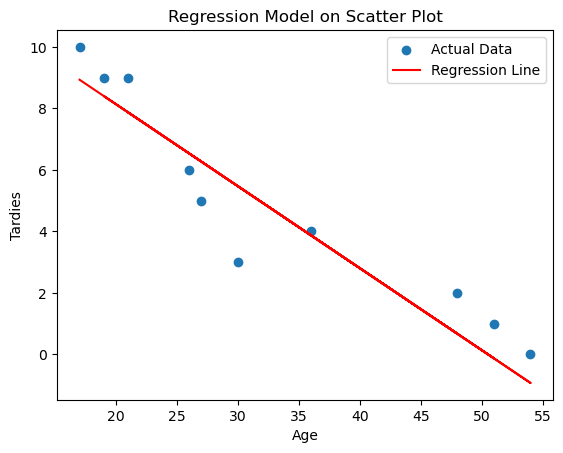

In [34]:
plt.scatter(student_data['Age'], student_data['Tardies'], label='Actual Data')


regression_line = linreg.coef_[0] * student_data['Age'] + linreg.intercept_
plt.plot(student_data['Age'], regression_line, color='red', label='Regression Line')

# Title and labels
plt.title('Regression Model on Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Tardies')

plt.legend()

plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [4]:
# Your response here. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 